In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_norm = pd.read_csv('../Trabalho UX/CoAHD-Normalized.csv', sep=',', encoding='ANSI', low_memory=False)

In [3]:
df_filtradoCost = df_norm[df_norm['Area'] == 'Brazil']

In [4]:
items_of_interest_cost = [
    'Cost of a healthy diet',
    'Cost of an energy sufficient diet',
    'Cost of a nutrient adequate diet',
    'Cost of fruits',
    'Cost of vegetables',
    'Cost of starchy staples',
    'Cost of animal-source foods',
    'Cost of legumes, nuts and seeds',
    'Cost of oils and fats',
    'Affordability of a healthy diet: ratio of cost to food expenditures',
    'Percent of the population unable to afford nutrient adequacy'
]

In [5]:
df_filteredCost = df_filtradoCost[df_filtradoCost['Item'].isin(items_of_interest_cost)].set_index('Item')

In [6]:
df_filteredCost_T = df_filteredCost.T

In [7]:
df_filteredCost_T_numeric = df_filteredCost_T.apply(pd.to_numeric, errors='coerce')

In [8]:
#sem nulo
print(df_filtradoCost.isnull().sum())

Area Code          0
Area Code (M49)    0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Year Code          0
Year               0
Unit               0
Value              0
Flag               0
dtype: int64


In [9]:
Q1 = df_filteredCost_T_numeric.quantile(0.25)
Q3 = df_filteredCost_T_numeric.quantile(0.75)
IQR = Q3 - Q1

In [10]:
outliers = ((df_filteredCost_T_numeric < (Q1 - 1.5 * IQR)) | (df_filteredCost_T_numeric > (Q3 + 1.5 * IQR)))

In [11]:
print("Outliers detectados:")
print(outliers.sum())

Outliers detectados:
Item
Cost of starchy staples            0
Cost of legumes, nuts and seeds    0
Cost of vegetables                 0
Cost of fruits                     0
Cost of oils and fats              0
dtype: int64


In [12]:
print(df_filteredCost_T_numeric.dtypes)

Item
Cost of starchy staples            float64
Cost of legumes, nuts and seeds    float64
Cost of vegetables                 float64
Cost of fruits                     float64
Cost of oils and fats              float64
dtype: object


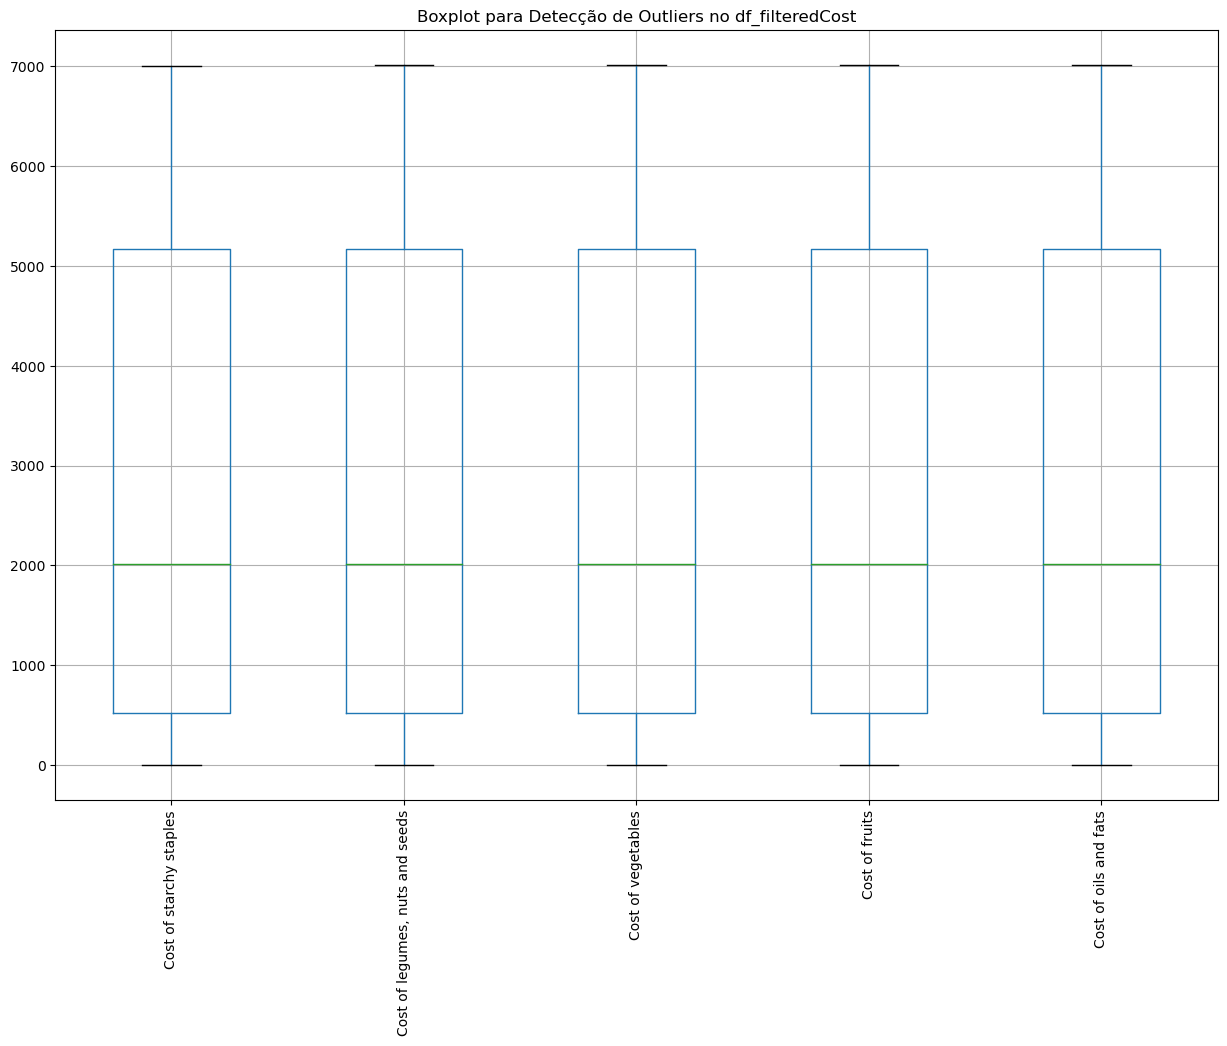

In [13]:
plt.figure(figsize=(15, 10))
df_filteredCost_T_numeric.boxplot(rot=90)
plt.title("Boxplot para Detecção de Outliers no df_filteredCost")
plt.show()
